In [11]:
# DATA COLLECTION

In [28]:
#DATA COLLECTION
#DATA COLLECTED IS STORED IN A CSV FILE NAMED AS "file.csv"
#DO NOT EXECUTE THIS SNIPPET ALL THE DATA COLLECTED IS STORED IN "file.csv", it is available drectly in github repository
import json
import csv
import os

def process_json_file(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        json_data = json.load(file)

    data = []

    for source in json_data.get("Sources", []):
        chatgpt_sharing = source.get("ChatgptSharing", [])
        if chatgpt_sharing:
            first_conversation = chatgpt_sharing[0].get("Conversations", [])
            if first_conversation:
                user_prompt = first_conversation[0].get("Prompt", "Unknown")
                answer = first_conversation[0].get("Answer", "Unknown")
                code_list = first_conversation[0].get("ListOfCode", [])
                code_content = code_list[0]["Content"] if code_list else "Unknown"
            else:
                user_prompt, answer, code_content = "Unknown", "Unknown", "Unknown"
        else:
            user_prompt, answer, code_content = "Unknown", "Unknown", "Unknown"

        author = source.get("Author", "Unknown")

        data.append({"Author": author, "Prompt": user_prompt, "Answer": answer, "CodeContent": code_content})

    return data

# Specify the directory containing the JSON files
json_files_directory = "/content"  # Replace with the directory path

# Specify the CSV file path
csv_file_path = "combined_file.csv"  # Replace with the desired CSV file path

# Process each JSON file and combine the results
all_data = []
for filename in os.listdir(json_files_directory):
    if filename.endswith(".json"):
        file_path = os.path.join(json_files_directory, filename)
        file_data = process_json_file(file_path)
        all_data.extend(file_data)

# Write combined data to CSV file with utf-8 encoding and handling special characters
with open(csv_file_path, "w", newline="", encoding="utf-8-sig") as csvfile:
    fieldnames = ["Author", "Prompt", "Answer", "CodeContent"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # Write header
    writer.writeheader()

    # Write data rows
    for row in all_data:
        writer.writerow(row)


In [ ]:
#DATA PREPROCESSING

In [15]:
#import all necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download("punkt")
nltk.download("stopwords")
english_stopwords = set(stopwords.words("english"))
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
#Read the data collected
df = pd.read_csv("file.csv")

In [17]:
#Text Preprocessing
def preprocess_text(text):
    words = word_tokenize(text)
    words = [word for word in words if word.lower() not in english_stopwords]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)


In [19]:
#Storing Preprocessed
df['Processed_Prompt'] = df['Prompt'].astype(str).apply(preprocess_text)

In [23]:
pip install langdetect


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=daed52df506cc51babd695e3f5bfd62da81de3e09f11432813878b91bd09bb18
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [24]:
from langdetect import detect

In [25]:
#filtering out non english prompts
def is_english(text):
    if isinstance(text, str):
        try:
            return detect(text) == 'en'
        except Exception:
            return False
    else:
        return False

In [26]:
def english_prompts(df):
    english = df["Processed_Prompt"].apply(is_english)
    return df[english].reset_index(drop = True)
df = english_prompts(df)



In [29]:
df

,Prompt,Answer,ListOfCode,Processed_Prompt
0,You are an expert search query generator.\n\nI...,"ChatGPTCertainly, here are 10 high-quality sea...","[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",expert search queri gener . instruct : 1 . gen...
1,Please analyse the text below to find the root...,ChatGPTHere is the JSON output analyzing the r...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",pleas analys text find root caus literaci gap ...
2,https://github.com/arakoodev/EdgeChains,ChatGPTFinished browsingShow workHide workEdge...,[],http : //github.com/arakoodev/edgechain
3,can this be used from python:\nhttps://github....,"ChatGPTYes, EdgeChains can be used from Python...",[],use python : http : //github.com/arakoodev/edg...
4,give me an example,ChatGPTI do not have an example. You may find ...,[],give exampl
...,...,...,...,...
3500,provide a how to for using the command line to...,ChatGPTYou can use the command line to create ...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",provid use command line creat seri nest directori
3501,received this error code when verifying the st...,ChatGPTI apologize for the confusion. It seems...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",receiv error code verifi structur dir : find p...
3502,the echo command is not working,ChatGPTI apologize for the confusion. If the e...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",echo command work
3503,the echo command is still not working on windo...,ChatGPTI apologize for the inconvenience. If t...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",echo command still work window powershel


In [30]:
df["Prompt"][1]

"Please analyse the text below to find the root causes for the literacy gap, only provide analysis from the text that is directly related to the literacy gap and it's root causes.\n\nOutput as JSON in this format [ { rootCause, description, why,  how } ] \n\nImproving Literacy as a Means to Reducing Health Disparities\nSomnath Saha, MD, MPH\nAuthor information Copyright and License information PMC Disclaimer\nRacial and socioeconomic disparities in morbidity and mortality have been apparent virtually as long as health statistics have been collected. In the United States, African Americans in particular fare worse than the majority population on nearly all measures of health, including infant mortality; life expectancy; cancer, heart disease, stroke, and trauma incidence and mortality; and self-rated health status.1 Individuals with low levels of educational attainment and income also tend to experience higher rates of illness and death, independent of race.2–4 Over the past several dec

In [31]:
df["Processed_Prompt"][1]

"pleas analys text find root caus literaci gap , provid analysi text directli relat literaci gap 's root caus . output json format [ { rootcaus , descript , , } ] improv literaci mean reduc health dispar somnath saha , md , mph author inform copyright licens inform pmc disclaim racial socioeconom dispar morbid mortal appar virtual long health statist collect . unit state , african american particular fare wors major popul nearli measur health , includ infant mortal ; life expect ; cancer , heart diseas , stroke , trauma incid mortal ; self-rat health status.1 individu low level educ attain incom also tend experi higher rate ill death , independ race.2–4 past sever decad , though u.s. popul whole enjoy substanti declin morbid mortality—larg due better live condit , public health measur , advanc medic care—raci socioeconom dispar persist even widened.1,5 elimin dispar becom nation prioriti . 1 2 primari object nation 's public health agenda6 central focu recent establish nation center mi

In [ ]:
# final_df = df[["Prompt", "Processed_Prompt"]]
# final_df

In [32]:
# constructing Vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Processed_Prompt'])

In [33]:
#defining number of clusters and applying k means to the dataframe
num_clusters =4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)
for cluster_id in range(num_clusters):
    cluster_samples = df[df['cluster'] == cluster_id]['Processed_Prompt']
    print(f"Cluster {cluster_id + 1}:\n{cluster_samples}\n")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
0       expert search queri gener . instruct : 1 . gen...
1       pleas analys text find root caus literaci gap ...
4                                             give exampl
7       'm see noth server log . sinc 500 error happen...
9       ye inde . among thing , let 's inspect postgr ...
                              ...                        
3493    `` all-on '' two word . option one word case u...
3494               still two word , without space . tri .
3497                gener . also tri find standard word .
3502                                    echo command work
3503             echo command still work window powershel
Name: Processed_Prompt, Length: 1487, dtype: object

Cluster 2:
2                 http : //github.com/arakoodev/edgechain
3       use python : http : //github.com/arakoodev/edg...
5       write python3 script take mp3 audio track gene...
6       devicedata.jsjavascriptth attach next.j page m...
8       getdeviceinfo.jsjavascriptwa deviceinfo.j ? co.

In [34]:
# Finding out top occuring terms in each cluster to name the clusters.
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    top_terms = [terms[ind] for ind in order_centroids[i, :20]]
    print(f"Cluster {i}: {top_terms}")

Cluster 0: ['would', 'use', 'think', 'pleas', 'like', 'one', 'time', 'could', 'want', 'give', 'make', 'anoth', 'repeat', 'show', 'work', 'go', 'answer', 'user', 'thank', 'need']
Cluster 1: ['file', 'python', 'http', 'name', 'use', 'import', 'line', 'return', 'com', 'error', 'string', 'pi', 'github', 'self', 'number', 'write', 'run', 'const', 'token', 'get']
Cluster 2: ['file', 'task', 'prompt', 'import', 'sh', 'md', 'junior', 'src', 'const', 'yaml', 'git', 'set', 'echo', 'solv', 'work', 'exampl', 'script', 'creat', 'use', 'await']
Cluster 3: ['file', 'task', 'import', 'const', 'solv', 'exampl', 'set', 'sh', 'export', 'echo', 'frontend', 'div', 'components', 'use', 'jsx', 'need', 'text', 'work', 'start', 'creat']


In [40]:
# mapping prompts to clusters
cluster_to_category = {0: 'Software Development', 1: 'Programming and Error Handling', 2: 'Problem Solving and Decision Making', 3: 'Web Development'}
df['Category'] = df['cluster'].map(cluster_to_category)

In [36]:
df

,Prompt,Answer,ListOfCode,Processed_Prompt,cluster,Category
0,You are an expert search query generator.\n\nI...,"ChatGPTCertainly, here are 10 high-quality sea...","[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",expert search queri gener . instruct : 1 . gen...,0,Software Development
1,Please analyse the text below to find the root...,ChatGPTHere is the JSON output analyzing the r...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",pleas analys text find root caus literaci gap ...,0,Software Development
2,https://github.com/arakoodev/EdgeChains,ChatGPTFinished browsingShow workHide workEdge...,[],http : //github.com/arakoodev/edgechain,1,Programming and Error Handling
3,can this be used from python:\nhttps://github....,"ChatGPTYes, EdgeChains can be used from Python...",[],use python : http : //github.com/arakoodev/edg...,1,Programming and Error Handling
4,give me an example,ChatGPTI do not have an example. You may find ...,[],give exampl,0,Software Development
...,...,...,...,...,...,...
3500,provide a how to for using the command line to...,ChatGPTYou can use the command line to create ...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",provid use command line creat seri nest directori,1,Programming and Error Handling
3501,received this error code when verifying the st...,ChatGPTI apologize for the confusion. It seems...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",receiv error code verifi structur dir : find p...,1,Programming and Error Handling
3502,the echo command is not working,ChatGPTI apologize for the confusion. If the e...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",echo command work,0,Software Development
3503,the echo command is still not working on windo...,ChatGPTI apologize for the inconvenience. If t...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",echo command still work window powershel,0,Software Development


In [37]:
# importing libraries to construct a count plot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

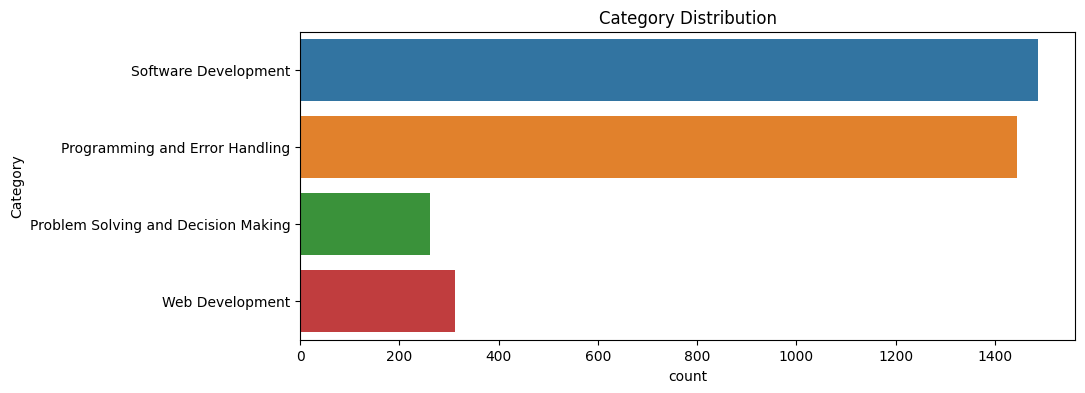

In [38]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, y="Category")
plt.title("Category zzDistribution")
plt.show()